In [273]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
# Realizando leitura do arquivo despesas_candidatos_2008_brasil.csv com delimitação de leitura de colunas, pulo de linhas e número de linhas a serem lidas.

fields = ['NM_UE', "SG_UE_SUPERIOR", 'NO_CAND', 'DS_CARGO', 'VR_DESPESA']
despesas_2008 = pd.read_csv('drive/My Drive/Colab Notebooks/despesas_candidatos_2008_brasil.csv', delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", engine="python",
names = ["SEQUENCIAL_CANDIDATO", "NO_CAND", "DS_CARGO", "CD_CARGO", "NR_CAND", "SG_UE_SUPERIOR", "NM_UE", "SG_UE", "NR_CNPJ", "NR_PARTIDO", "SG_PART", "VR_DESPESA", "DT_DESPESA", "DS_TITULO",
"CD_TITULO", "DS_ESP_RECURSO", "CD_ESP_RECURSO", "DS_NR_DOCUMENTO", "DS_TIPO_DOCUMENTO", "CD_TIPO_DOCUMENTO", "NM_FORNECEDOR", "CD_CPF_CNPJ_FORNECEDOR", "SG_UE_SUPERIOR1", "NM_UE1", "SG_UE1",
"NO_UE", "SITUACAOCADASTRAL", "NM_ADM", "NR_CPF"], usecols=fields, skiprows=3315816, nrows=945412)


In [276]:
# Realizando tratamento da coluna VR_DESPESA

lista = ['VR_DESPESA']

for col in lista:
  despesas_2008[col] = despesas_2008[col].str.replace(',', '.')

# Realizando filtragem de resultados de linhas

despesas_2008['VR_DESPESA'] = despesas_2008['VR_DESPESA'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
despesas_2008 = despesas_2008[despesas_2008['DS_CARGO'] =='Prefeito']
despesas_2008 = despesas_2008[despesas_2008['SG_UE_SUPERIOR'] =='SP']
despesas_2008 = despesas_2008.groupby(['NM_UE', 'NO_CAND']).sum()
despesas_2008 = despesas_2008[despesas_2008['VR_DESPESA'] == despesas_2008.groupby('NM_UE')['VR_DESPESA'].transform('max')]
despesas_2008 = despesas_2008.reset_index()
despesas_2008


,NM_UE,NO_CAND,VR_DESPESA
0,ADAMANTINA,JOSE FRANCISCO FIGUEIREDO MICHELONI,37707.01
1,ADOLFO,JOÃO DONIZETTE THEODORO,54472.20
2,AGUAÍ,SEBASTIÃO BIAZZO,474333.30
3,AGUDOS,EVERTON OCTAVIANI,113373.56
4,ALAMBARI,SANDRO DE JESUS DE CAMARGO,15996.00
...,...,...,...
640,ÁGUAS DE SÃO PEDRO,PAULO CESAR BORGES,35800.72
641,ÁLVARES FLORENCE,ALBERTO CESAR DE CAIRES,26456.10
642,ÁLVARES MACHADO,JULIANO RIBEIRO GARCIA,45183.48
643,ÁLVARO DE CARVALHO,ADHEMAR KEMP MARCONDES DE MOURA,18492.72


In [277]:
# Leitura e tratamento dos nomes das colunas do arquivo consulta_cand_2008_SP.txt

candidatos_2008 = pd.read_csv("drive/My Drive/Colab Notebooks/consulta_cand_2008_SP.txt", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", names=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","DESCRICAO_UE","CODIGO_CARGO","DESCRICAO_CARGO","NOME_CANDIDATO","SEQUENCIAL_CANDIDATO","NUMERO_CANDIDATO","CPF_CANDIDATO","NOME_URNA_CANDIDATO","COD_SITUACAO_CANDIDATURA","DES_SITUACAO_CANDIDATURA","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","CODIGO_LEGENDA","SIGLA_LEGENDA","COMPOSICAO_LEGENDA","NOME_LEGENDA","CODIGO_OCUPACAO","DESCRICAO_OCUPACAO","DATA_NASCIMENTO","NUM_TITULO_ELEITORAL_CANDIDATO","IDADE_DATA_ELEICAO","CODIGO_SEXO","DESCRICAO_SEXO","COD_GRAU_INSTRUCAO","DESCRICAO_GRAU_INSTRUCAO","CODIGO_ESTADO_CIVIL","DESCRICAO_ESTADO_CIVIL","CODIGO_NACIONALIDADE","DESCRICAO_NACIONALIDADE","SIGLA_UF_NASCIMENTO","CODIGO_MUNICIPIO_NASCIMENTO","NOME_MUNICIPIO_NASCIMENTO","DESPESA_MAX_CAMPANHA","COD_SIT_TOT_TURNO","DESC_SIT_TOT_TURNO"])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,15,17,20,24,29,31,33,35,38,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [278]:
# Filtragem dos resultados das linhas

candidatos_2008 = candidatos_2008[['NOME_CANDIDATO', 'DESCRICAO_CARGO', 'DESCRICAO_UE', 'DESCRICAO_SEXO']]
candidatos_2008 = candidatos_2008[candidatos_2008.DESCRICAO_CARGO == "PREFEITO"]
candidatos_2008 = candidatos_2008.reset_index()
candidatos_2008

,index,NOME_CANDIDATO,DESCRICAO_CARGO,DESCRICAO_UE,DESCRICAO_SEXO
0,0,ADALBERTO FASSINA,PREFEITO,AGUAÍ,MASCULINO
1,1,FLAVIO JOSE LEGASPE MAMEDE,PREFEITO,AGUAÍ,MASCULINO
2,2,GUTEMBERG ADRIAN DE OLIVEIRA,PREFEITO,AGUAÍ,MASCULINO
3,6,NELSON DIMAS BRAMBILA,PREFEITO,ARARAS,MASCULINO
4,7,PEDRO ELISEU SOBRINHO,PREFEITO,ARARAS,MASCULINO
...,...,...,...,...,...
2018,63471,CARLOS THIAGO SARAN,PREFEITO,VOTUPORANGA,MASCULINO
2019,63472,LUIZ ALBERTO DIAS ZAMBON,PREFEITO,VOTUPORANGA,MASCULINO
2020,63473,NASSER MARÃO FILHO,PREFEITO,VOTUPORANGA,MASCULINO
2021,63590,LOURENÇO ZACARIAS,PREFEITO,ZACARIAS,MASCULINO


In [279]:
# Leitura e tratamento dos nomes das colunas do arquivo votacao_candidato_munzona_2008_SP.txt

resultados_2008 = pd.read_csv("drive/My Drive/Colab Notebooks/votacao_candidato_munzona_2008_SP.txt", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", names=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","NOME_MUNICIPIO","NUMERO_ZONA","CODIGO_CARGO","NUMERO_CAND","SQ_CANDIDATO","NOME_CANDIDATO","NOME_URNA_CANDIDATO","DESCRICAO_CARGO","COD_SIT_CAND_SUPERIOR","DESC_SIT_CAND_SUPERIOR","CODIGO_SIT_CANDIDATO","DESC_SIT_CANDIDATO","CODIGO_SIT_CAND_TOT","DESC_SIT_CAND_TOT","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","SEQUENCIAL_LEGENDA","NOME_COLIGACAO","COMPOSICAO_LEGENDA","TOTAL_VOTOS"])

In [280]:
# Filtragem dos resultados das linhas

resultados_2008 = resultados_2008[['NOME_MUNICIPIO', 'DESCRICAO_CARGO', 'NOME_CANDIDATO', 'TOTAL_VOTOS', 'NUM_TURNO']]
resultados_2008 = resultados_2008[resultados_2008.DESCRICAO_CARGO == "PREFEITO"]
resultados_2008 = resultados_2008[resultados_2008['TOTAL_VOTOS'] == resultados_2008.groupby('NOME_MUNICIPIO')['TOTAL_VOTOS'].transform('max')]
resultados_2008 = resultados_2008.reset_index()
resultados_2008

,index,NOME_MUNICIPIO,DESCRICAO_CARGO,NOME_CANDIDATO,TOTAL_VOTOS,NUM_TURNO
0,1,ADAMANTINA,PREFEITO,JOSE FRANCISCO FIGUEIREDO MICHELONI,15582,1
1,76,ADOLFO,PREFEITO,JOÃO DONIZETTE THEODORO,1545,1
2,134,AGUAÍ,PREFEITO,GUTEMBERG ADRIAN DE OLIVEIRA,9999,1
3,219,AGUDOS,PREFEITO,EVERTON OCTAVIANI,9538,1
4,297,ALAMBARI,PREFEITO,SANDRO DE JESUS DE CAMARGO,1625,1
...,...,...,...,...,...,...
646,136126,MAUÁ,PREFEITO,OSWALDO DIAS,41126,2
647,136129,SANTO ANDRÉ,PREFEITO,AIDAN ANTONIO RAVIN,35588,2
648,136147,SÃO BERNARDO DO CAMPO,PREFEITO,LUIZ MARINHO,55760,2
649,136161,SÃO JOSÉ DO RIO PRETO,PREFEITO,JOAO PAULO RILLO,46011,2


In [281]:
# Leitura, Delimitação de colunas e tratamento do arquivo POP2008_DOU.xls

fields = ['UF', 'NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA']
est_pop_2008 = pd.read_excel('drive/My Drive/Colab Notebooks/POP2008_DOU.xls', skiprows=5, names = ['UF','CODÍGO UF','CÓDIGO MUNICÍPIO','MUNICÍPIOS','POPULAÇÃO ESTIMADA'], nrows = 5565 )
est_pop_2008 = est_pop_2008.apply(lambda x: x.astype(str).str.upper())

In [282]:
# Filtragem dos resultados da linha

est_pop_2008 = est_pop_2008[est_pop_2008.UF == "SP"]
est_pop_2008 = est_pop_2008.reset_index()

In [283]:
# Verificação da existencia dos nomes das cidades

lista = [x for x in despesas_2008['NM_UE']  if x not in list(est_pop_2008['MUNICÍPIOS'])]
print(lista)

['ARCO ÍRIS', 'BADY BASSIT', 'BIRITIBA MIRIM', 'IPAUÇU', 'LUISIÂNIA', 'MOJI-GUACU', 'MOJI-MIRIM', 'SANTO ANTÔNIO DA POSSE', 'SUD MENUCCI', 'TARABAÍ']


In [284]:
# Impressão dos nomes de todas as cidades do estado de São Paulo

lista = [x for x in est_pop_2008['MUNICÍPIOS']]
print(lista)

['ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'AGUDOS', 'ALAMBARI', 'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS', 'ALTO ALEGRE', 'ALUMÍNIO', 'ÁLVARES FLORENCE', 'ÁLVARES MACHADO', 'ÁLVARO DE CARVALHO', 'ALVINLÂNDIA', 'AMERICANA', 'AMÉRICO DE CAMPOS', 'AMÉRICO BRASILIENSE', 'AMPARO', 'ANALÂNDIA', 'ANDRADINA', 'ANGATUBA', 'ANHEMBI', 'ANHUMAS', 'APARECIDA', "APARECIDA D'OESTE", 'APIAÍ', 'ARAÇARIGUAMA', 'ARAÇATUBA', 'ARAÇOIABA DA SERRA', 'ARAMINA', 'ARANDU', 'ARAPEÍ', 'ARARAQUARA', 'ARARAS', 'ARCO-ÍRIS', 'AREALVA', 'AREIAS', 'AREIÓPOLIS', 'ARIRANHA', 'ARTUR NOGUEIRA', 'ARUJÁ', 'ASPÁSIA', 'ASSIS', 'ATIBAIA', 'AURIFLAMA', 'AVAÍ', 'AVANHANDAVA', 'AVARÉ', 'BADY BASSITT', 'BALBINOS', 'BÁLSAMO', 'BANANAL', 'BARÃO DE ANTONINA', 'BARBOSA', 'BARIRI', 'BARRA DO CHAPÉU', 'BARRA DO TURVO', 'BARRA BONITA', 'BARRETOS', 'BARRINHA', 'BARUERI', 'BASTOS', 'BATATAIS', 'BAURU', 'BEBEDOURO', 'BENTO DE ABREU', 'BERNARDINO DE CAMPOS', 'BER

In [285]:
# Renomeação das cidades com nomes em disparidade

lista = ['MUNICÍPIOS']

for col in lista:
  est_pop_2008[col] = est_pop_2008[col].str.replace('ARCO-ÍRIS', 'ARCO ÍRIS')
  est_pop_2008[col] = est_pop_2008[col].str.replace('BADY BASSITT', 'BADY BASSIT')
  est_pop_2008[col] = est_pop_2008[col].str.replace('BIRITIBA-MIRIM', 'BIRITIBA MIRIM')
  est_pop_2008[col] = est_pop_2008[col].str.replace('IPAUSSU', 'IPAUÇU')
  est_pop_2008[col] = est_pop_2008[col].str.replace('LUIZIÂNIA', 'LUISIÂNIA')
  est_pop_2008[col] = est_pop_2008[col].str.replace('MOGI GUAÇU', 'MOJI-GUACU')
  est_pop_2008[col] = est_pop_2008[col].str.replace('MOJI MIRIM', 'MOJI-MIRIM')
  est_pop_2008[col] = est_pop_2008[col].str.replace('SANTO ANTÔNIO DE POSSE', 'SANTO ANTÔNIO DA POSSE')
  est_pop_2008[col] = est_pop_2008[col].str.replace('SUD MENNUCCI', 'SUD MENUCCI')
  est_pop_2008[col] = est_pop_2008[col].str.replace('TARABAI', 'TARABAÍ')

In [286]:
# Exibindo dataframe

est_pop_2008

,index,UF,CODÍGO UF,CÓDIGO MUNICÍPIO,MUNICÍPIOS,POPULAÇÃO ESTIMADA
0,3265,SP,35.0,105.0,ADAMANTINA,34366.0
1,3266,SP,35.0,204.0,ADOLFO,3711.0
2,3267,SP,35.0,303.0,AGUAÍ,31763.0
3,3268,SP,35.0,402.0,ÁGUAS DA PRATA,7684.0
4,3269,SP,35.0,501.0,ÁGUAS DE LINDÓIA,16335.0
...,...,...,...,...,...,...
640,3905,SP,35.0,56909.0,VISTA ALEGRE DO ALTO,6682.0
641,3906,SP,35.0,56958.0,VITÓRIA BRASIL,1664.0
642,3907,SP,35.0,57006.0,VOTORANTIM,104413.0
643,3908,SP,35.0,57105.0,VOTUPORANGA,80819.0


In [287]:
# Criação de nova dataframe com filtragem do dataframe est_pop_2008 com despesas_2008

concatenação_2008 = pd.concat([est_pop_2008.set_index('MUNICÍPIOS'),despesas_2008.set_index('NM_UE')], axis=1, join='inner')
concatenação_2008 = concatenação_2008[['POPULAÇÃO ESTIMADA','NO_CAND','VR_DESPESA']]

In [288]:
# Verificação da ocorrencia do nome dos candidatos no dataframe candidatos_2008 em comparação com o dataframe concatenação_2008

lista = [x for x in concatenação_2008['NO_CAND'] if x not in list(candidatos_2008['NOME_CANDIDATO'])]
print(lista)

["WANDERLEY JOSÉ CASSIANO SANT'ANNA"]


In [289]:
# Verificação de nomes duplicados no dataframe concatenação_2008

lista = [x for x in concatenação_2008['NO_CAND'] if list(concatenação_2008['NO_CAND']).count(x) > 1]
print(lista)

['JOÃO BATISTA DE ANDRADE', 'JOÃO BATISTA DE ANDRADE']


In [290]:
# Verificação dos resultados duplicados

concatenação_2008[concatenação_2008['NO_CAND'] == 'JOÃO BATISTA DE ANDRADE']

,POPULAÇÃO ESTIMADA,NO_CAND,VR_DESPESA
JACUPIRANGA,16403.0,JOÃO BATISTA DE ANDRADE,68465.26
PITANGUEIRAS,35070.0,JOÃO BATISTA DE ANDRADE,217206.49


In [291]:
# Verificação e adição ao dataframe se o candidato foi o mais votado ou não 

concatenação_2008 = concatenação_2008.reset_index()
mais_votado = []
for x in range(len(concatenação_2008['NO_CAND'])):
    if concatenação_2008['NO_CAND'][x] in list(resultados_2008['NOME_CANDIDATO']):
        mais_votado.append('SIM')
    else:
        mais_votado.append('NÃO')

concatenação_2008['MAIS VOTADO'] = mais_votado

# Adição do gênero de cada candidato

genero = []
candidato = []
for x, val1 in enumerate(concatenação_2008['NO_CAND']):
    if val1 == "WANDERLEY JOSÉ CASSIANO SANT'ANNA" :
        candidato.append(val1)
        genero.append('Não Identificado')
    for y, val2 in enumerate(candidatos_2008['NOME_CANDIDATO']):
        if val1 == val2:
            if val1 not in candidato:
                candidato.append(candidatos_2008['NOME_CANDIDATO'][y])
                genero.append(candidatos_2008['DESCRICAO_SEXO'][y])
                if val1 == 'JOÃO BATISTA DE ANDRADE' :
                    candidato.append(val1)
                    genero.append(candidatos_2008['DESCRICAO_SEXO'][y])

concatenação_2008['DS_GENERO'] = genero

In [292]:
# Tratamento do dado 

concatenação_2008['POPULAÇÃO ESTIMADA'] = concatenação_2008['POPULAÇÃO ESTIMADA'].apply(lambda x: pd.to_numeric(x.replace(',','.'), errors='coerce'))

In [293]:
# Filtragem por tamanho de população

ate1mil_2008 = concatenação_2008[concatenação_2008['POPULAÇÃO ESTIMADA'] <= 1000]

ate10mil_2008 = concatenação_2008[(concatenação_2008['POPULAÇÃO ESTIMADA'] > 1000) & (concatenação_2008['POPULAÇÃO ESTIMADA'] <= 10000)]

ate100mil_2008 = concatenação_2008[(concatenação_2008['POPULAÇÃO ESTIMADA'] > 10000) & (concatenação_2008['POPULAÇÃO ESTIMADA'] <= 100000)]

ate1milhao_2008 = concatenação_2008[(concatenação_2008['POPULAÇÃO ESTIMADA'] > 100000) & (concatenação_2008['POPULAÇÃO ESTIMADA'] <= 1000000)]

maior1milhao_2008 = concatenação_2008[concatenação_2008['POPULAÇÃO ESTIMADA'] > 1000000]


In [294]:
# Realizando leitura do arquivo despesas_candidatos_2012_SP.txt com delimitação de leitura de colunas

fields = ['Município', 'Nome candidato', 'Cargo', 'Valor despesa']
despesas_2012 = pd.read_csv('drive/My Drive/Colab Notebooks/despesas_candidatos_2012_SP.txt', delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", engine="python", usecols=fields, warn_bad_lines=False)


In [295]:
# Tratamento e filtragem dos dados

despesas_2012['Valor despesa'] = despesas_2012['Valor despesa'].apply(lambda x: pd.to_numeric(x.replace(',','.'), errors='coerce'))
despesas_2012 = despesas_2012[despesas_2012['Cargo'] =='Prefeito']
despesas_2012 = despesas_2012.groupby(['Município', 'Nome candidato']).sum()
despesas_2012 = despesas_2012[despesas_2012['Valor despesa'] == despesas_2012.groupby('Município')['Valor despesa'].transform('max')]
despesas_2012 = despesas_2012.reset_index()
despesas_2012

,Município,Nome candidato,Valor despesa
0,ADAMANTINA,JOSÉ ROBERTO FERREIRA,47561.20
1,ADOLFO,NELSON GIMENEZ RIBEIRO,49510.60
2,AGUAÍ,SEBASTIÃO BIAZZO,165803.27
3,AGUDOS,EVERTON OCTAVIANI,112300.00
4,ALAMBARI,HUDSON JOSE GOMES,25200.00
...,...,...,...
638,ÁGUAS DE SÃO PEDRO,PAULO CESAR BORGES,20742.50
639,ÁLVARES FLORENCE,CALIMERIO LUIZ CORREA SALES,21166.12
640,ÁLVARES MACHADO,JULIANO RIBEIRO GARCIA,68349.69
641,ÁLVARO DE CARVALHO,MARCOS DEL CASTILHO ZORZETO,13078.31


In [296]:
# Leitura e tratamento do arquivo consulta_cand_2012_SP.txt

candidatos_2012 = pd.read_csv("drive/My Drive/Colab Notebooks/consulta_cand_2012_SP.txt", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", names=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","DESCRICAO_UE","CODIGO_CARGO","DESCRICAO_CARGO","NOME_CANDIDATO","SEQUENCIAL_CANDIDATO","NUMERO_CANDIDATO","CPF_CANDIDATO","NOME_URNA_CANDIDATO","COD_SITUACAO_CANDIDATURA","DES_SITUACAO_CANDIDATURA","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","CODIGO_LEGENDA","SIGLA_LEGENDA","COMPOSICAO_LEGENDA","NOME_LEGENDA","CODIGO_OCUPACAO","DESCRICAO_OCUPACAO","DATA_NASCIMENTO","NUM_TITULO_ELEITORAL_CANDIDATO","IDADE_DATA_ELEICAO","CODIGO_SEXO","DESCRICAO_SEXO","COD_GRAU_INSTRUCAO","DESCRICAO_GRAU_INSTRUCAO","CODIGO_ESTADO_CIVIL","DESCRICAO_ESTADO_CIVIL","CODIGO_NACIONALIDADE","DESCRICAO_NACIONALIDADE","SIGLA_UF_NASCIMENTO","CODIGO_MUNICIPIO_NASCIMENTO","NOME_MUNICIPIO_NASCIMENTO","DESPESA_MAX_CAMPANHA","COD_SIT_TOT_TURNO","DESC_SIT_TOT_TURNO","NM_EMAIL"])

In [297]:
# Filtragem dos resultados das linhas

candidatos_2012 = candidatos_2012[['NOME_CANDIDATO', 'DESCRICAO_CARGO', 'DESCRICAO_UE', 'DESCRICAO_SEXO']]
candidatos_2012 = candidatos_2012[candidatos_2012.DESCRICAO_CARGO == "PREFEITO"]
candidatos_2012 = candidatos_2012.reset_index()
candidatos_2012

,index,NOME_CANDIDATO,DESCRICAO_CARGO,DESCRICAO_UE,DESCRICAO_SEXO
0,1917,ALEXANDRE DE SIQUEIRA BRAGA,PREFEITO,SÃO JOSÉ DO BARREIRO,MASCULINO
1,1932,MARIA APARECIDA DA SILVA PONTELLI,PREFEITO,SAGRES,FEMININO
2,1933,JOSE ROBERTO FUMACH,PREFEITO,ITATIBA,MASCULINO
3,1934,THIAGO RODRIGO ROCHITI,PREFEITO,TORRINHA,MASCULINO
4,1983,RENATO APARECIDO BENDETTI,PREFEITO,ITU,MASCULINO
...,...,...,...,...,...
2178,81740,MARINETE TENÓRIO CAVALCANTE,PREFEITO,BENTO DE ABREU,FEMININO
2179,81744,JOSE LUIZ DE PAULA CAMANDUCCI,PREFEITO,VARGEM,MASCULINO
2180,81745,SILAS MARQUES DA ROSA,PREFEITO,VARGEM,MASCULINO
2181,81746,CLAUDEMIR PEREIRA DA SILVA,PREFEITO,VARGEM,MASCULINO


In [298]:
# Leitura e tratamento do arquivo votacao_candidato_munzona_2012_SP.txt

resultados_2012 = pd.read_csv("drive/My Drive/Colab Notebooks/votacao_candidato_munzona_2012_SP.txt", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", names=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","NOME_MUNICIPIO","NUMERO_ZONA","CODIGO_CARGO","NUMERO_CAND","SQ_CANDIDATO","NOME_CANDIDATO","NOME_URNA_CANDIDATO","DESCRICAO_CARGO","COD_SIT_CAND_SUPERIOR","DESC_SIT_CAND_SUPERIOR","CODIGO_SIT_CANDIDATO","DESC_SIT_CANDIDATO","CODIGO_SIT_CAND_TOT","DESC_SIT_CAND_TOT","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","SEQUENCIAL_LEGENDA","NOME_COLIGACAO","COMPOSICAO_LEGENDA","TOTAL_VOTOS"])

In [299]:
# Filtragem dos resultados

resultados_2012 = resultados_2012[['NOME_MUNICIPIO', 'DESCRICAO_CARGO', 'NOME_CANDIDATO', 'TOTAL_VOTOS']]
resultados_2012 = resultados_2012[resultados_2012['TOTAL_VOTOS'] == resultados_2012.groupby('NOME_MUNICIPIO')['TOTAL_VOTOS'].transform('max')]
resultados_2012 = resultados_2012.reset_index()
resultados_2012

,index,NOME_MUNICIPIO,DESCRICAO_CARGO,NOME_CANDIDATO,TOTAL_VOTOS
0,35,CANITAR,PREFEITO,ANIBAL FELICIANO,1571
1,61,VOTORANTIM,PREFEITO,ERINALDO ALVES DA SILVA,23534
2,181,ARAMINA,PREFEITO,LUIZ FERNANDO DOS SANTOS,2125
3,220,QUINTANA,PREFEITO,FERNANDO BRANCO NUNES,3016
4,265,POMPÉIA,PREFEITO,OSCAR NORIO YASUDA,6661
...,...,...,...,...,...
641,178897,NOVA ALIANÇA,PREFEITO,JURANDIR BARBOSA DE MORAIS,2236
642,178911,POTIRENDABA,PREFEITO,GISLAINE MONTANARI FRANZOTTI,5216
643,181737,SANTANA DE PARNAÍBA,PREFEITO,ELVIS LEONARDO CEZAR,36096
644,182384,BOREBI,PREFEITO,MANOEL FRIAS FILHO,897


In [300]:
# Leitura e delimitação de colunas do arquivo estimativa_2012_TCU_20170614.xls

fields = ['UF', 'NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA']
est_pop_2012 = pd.read_excel('drive/My Drive/Colab Notebooks/estimativa_2012_TCU_20170614.xls', sheet_name="Municípios", skiprows=1, nrows=5570, usecols=fields)
est_pop_2012 = est_pop_2012.apply(lambda x: x.astype(str).str.upper())

In [301]:
# Filtragem das linhas do estado de São Paulo

est_pop_2012 = est_pop_2012[est_pop_2012.UF == "SP"]
est_pop_2012 = est_pop_2012.reset_index()

In [302]:
# Verificação da existencia dos nomes das cidades

lista = [x for x in despesas_2012['Município'] if x not in list(est_pop_2012['NOME DO MUNICÍPIO'])]
print(lista)

['BIRITIBA MIRIM', 'EMBU DAS ARTES', 'FLORÍNEA', 'GUAIMBÉ', 'ITAOCA', 'MOGI MIRIM']


In [303]:
# Impressão dos nomes das cidades 

lista = [x for x in est_pop_2012['NOME DO MUNICÍPIO']]
print(lista)

['ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'AGUDOS', 'ALAMBARI', 'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS', 'ALTO ALEGRE', 'ALUMÍNIO', 'ÁLVARES FLORENCE', 'ÁLVARES MACHADO', 'ÁLVARO DE CARVALHO', 'ALVINLÂNDIA', 'AMERICANA', 'AMÉRICO BRASILIENSE', 'AMÉRICO DE CAMPOS', 'AMPARO', 'ANALÂNDIA', 'ANDRADINA', 'ANGATUBA', 'ANHEMBI', 'ANHUMAS', 'APARECIDA', "APARECIDA D'OESTE", 'APIAÍ', 'ARAÇARIGUAMA', 'ARAÇATUBA', 'ARAÇOIABA DA SERRA', 'ARAMINA', 'ARANDU', 'ARAPEÍ', 'ARARAQUARA', 'ARARAS', 'ARCO-ÍRIS', 'AREALVA', 'AREIAS', 'AREIÓPOLIS', 'ARIRANHA', 'ARTUR NOGUEIRA', 'ARUJÁ', 'ASPÁSIA', 'ASSIS', 'ATIBAIA', 'AURIFLAMA', 'AVAÍ', 'AVANHANDAVA', 'AVARÉ', 'BADY BASSITT', 'BALBINOS', 'BÁLSAMO', 'BANANAL', 'BARÃO DE ANTONINA', 'BARBOSA', 'BARIRI', 'BARRA BONITA', 'BARRA DO CHAPÉU', 'BARRA DO TURVO', 'BARRETOS', 'BARRINHA', 'BARUERI', 'BASTOS', 'BATATAIS', 'BAURU', 'BEBEDOURO', 'BENTO DE ABREU', 'BERNARDINO DE CAMPOS', 'BER

In [304]:
# Correção dos nomes das cidades em disparidade

lista = ['NOME DO MUNICÍPIO']

for col in lista:
  est_pop_2012[col] = est_pop_2012[col].str.replace('BIRITIBA-MIRIM', 'BIRITIBA MIRIM')
  est_pop_2012[col] = est_pop_2012[col].str.replace('FLORÍNIA', 'FLORÍNEA')
  est_pop_2012[col] = est_pop_2012[col].str.replace('GUAIMBÊ', 'GUAIMBÉ')
  est_pop_2012[col] = est_pop_2012[col].str.replace('ITAÓCA', 'ITAOCA')
  est_pop_2012[col] = est_pop_2012[col].str.replace('EMBU', 'EMBU DAS ARTES')
  est_pop_2012[col] = est_pop_2012[col].str.replace('MOJI MIRIM', 'MOGI MIRIM')

In [305]:
# Nova verificação dos nomes das cidades 

lista = [x for x in est_pop_2012['NOME DO MUNICÍPIO']]
print(lista)

['ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'AGUDOS', 'ALAMBARI', 'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS', 'ALTO ALEGRE', 'ALUMÍNIO', 'ÁLVARES FLORENCE', 'ÁLVARES MACHADO', 'ÁLVARO DE CARVALHO', 'ALVINLÂNDIA', 'AMERICANA', 'AMÉRICO BRASILIENSE', 'AMÉRICO DE CAMPOS', 'AMPARO', 'ANALÂNDIA', 'ANDRADINA', 'ANGATUBA', 'ANHEMBI', 'ANHUMAS', 'APARECIDA', "APARECIDA D'OESTE", 'APIAÍ', 'ARAÇARIGUAMA', 'ARAÇATUBA', 'ARAÇOIABA DA SERRA', 'ARAMINA', 'ARANDU', 'ARAPEÍ', 'ARARAQUARA', 'ARARAS', 'ARCO-ÍRIS', 'AREALVA', 'AREIAS', 'AREIÓPOLIS', 'ARIRANHA', 'ARTUR NOGUEIRA', 'ARUJÁ', 'ASPÁSIA', 'ASSIS', 'ATIBAIA', 'AURIFLAMA', 'AVAÍ', 'AVANHANDAVA', 'AVARÉ', 'BADY BASSITT', 'BALBINOS', 'BÁLSAMO', 'BANANAL', 'BARÃO DE ANTONINA', 'BARBOSA', 'BARIRI', 'BARRA BONITA', 'BARRA DO CHAPÉU', 'BARRA DO TURVO', 'BARRETOS', 'BARRINHA', 'BARUERI', 'BASTOS', 'BATATAIS', 'BAURU', 'BEBEDOURO', 'BENTO DE ABREU', 'BERNARDINO DE CAMPOS', 'BER

In [306]:
# Nova correção dos nomes que apresentaram erro

lista = ['NOME DO MUNICÍPIO']

for col in lista:
  est_pop_2012[col] = est_pop_2012[col].str.replace('EMBU DAS ARTES-GUAÇU', 'EMBU-GUAÇU')

In [307]:
# Exibindo dataframe

est_pop_2012

,index,UF,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,3267,SP,ADAMANTINA,33843
1,3268,SP,ADOLFO,3538
2,3269,SP,AGUAÍ,32745
3,3270,SP,ÁGUAS DA PRATA,7653
4,3271,SP,ÁGUAS DE LINDÓIA,17438
...,...,...,...,...
640,3907,SP,VISTA ALEGRE DO ALTO,7208
641,3908,SP,VITÓRIA BRASIL,1747
642,3909,SP,VOTORANTIM,110755
643,3910,SP,VOTUPORANGA,86059


In [308]:
# Criação de nova dataframe com filtragem do dataframe est_pop_2012 com despesas_2012

concatenacao_2012 = pd.concat([despesas_2012.set_index('Município'),est_pop_2012.set_index('NOME DO MUNICÍPIO')], axis=1, join='inner')

In [309]:
# Verificação e adição ao dataframe se o candidato foi o mais votado ou não

concatenacao_2012 = concatenacao_2012.reset_index()
mais_votado = []
for x in range(len(concatenacao_2012['Nome candidato'])):
    if concatenacao_2012['Nome candidato'][x] in list(resultados_2012['NOME_CANDIDATO']):
        mais_votado.append('SIM')
    else:
        mais_votado.append('NÃO')

concatenacao_2012['MAIS VOTADO'] = mais_votado

# Adição do gênero de cada candidato

genero = []
candidato = []
for x, val1 in enumerate(concatenacao_2012['Nome candidato']):
    for y, val2 in enumerate(candidatos_2012['NOME_CANDIDATO']):
        if val1 == val2:
            if val1 not in candidato:
                candidato.append(candidatos_2012['NOME_CANDIDATO'][y])
                genero.append(candidatos_2012['DESCRICAO_SEXO'][y])

concatenacao_2012['DS_GENERO'] = genero

In [310]:
# Tratamento do dataframe concatenacao_2012

concatenacao_2012['POPULAÇÃO ESTIMADA'] = concatenacao_2012['POPULAÇÃO ESTIMADA'].apply(lambda x: pd.to_numeric(x.replace(',','.'), errors='coerce'))

In [311]:
# Verificação da ocorrencia dos nomes da cidades do estado de São Paulo

for x in despesas_2012['Município']:
  if x not in list(concatenacao_2012['level_0']):
    print (x)

PACAEMBU


In [312]:
# despesas_2012[despesas_2012['Município'] == 'GUZOLÂNDIA']

In [313]:
# Verificação da candidata não encontrada no dataframe concatenacao_2012

despesas_2012[despesas_2012['Município'] == "PACAEMBU"]

,Município,Nome candidato,Valor despesa
385,PACAEMBU,SIOMARA BERLANGA MUGANAI NEVES,46037.29


In [314]:
# Verificação da quantidade de votos que a candidata recebeu

resultados_2012[resultados_2012['NOME_MUNICIPIO'] == "PACAEMBU"]

,index,NOME_MUNICIPIO,DESCRICAO_CARGO,NOME_CANDIDATO,TOTAL_VOTOS
159,24814,PACAEMBU,PREFEITO,MACIEL DO CARMO COLPAS,3843


In [315]:
# Verificação das cidades que não estão presentes no dataframe concatenacao_2012

for x in resultados_2012['NOME_MUNICIPIO']:
  if x not in list(concatenacao_2012['level_0']):
    print (x)

JUNQUEIRÓPOLIS
PACAEMBU
GUZOLÂNDIA


In [316]:
# Delimitação de leitura de colunas do dataframe concatenacao_2012

concatenacao_2012 = concatenacao_2012[['level_0','Nome candidato','Valor despesa','UF','POPULAÇÃO ESTIMADA','MAIS VOTADO','DS_GENERO']]

In [317]:
# Adição da candidata omitida no dataframe concatenacao_2012

concatenacao_2012=concatenacao_2012.append(dict(zip(concatenacao_2012.columns,['PACAEMBU','SIOMARA BERLANGA MUGANAI NEVES',46037.29,'SP',13333,'NÃO','FEMININO'])),ignore_index=True)

In [318]:
# Verificação da inserção da candidata no dataframe concatenacao_2012

concatenacao_2012[concatenacao_2012['Nome candidato'] == "SIOMARA BERLANGA MUGANAI NEVES"]

,level_0,Nome candidato,Valor despesa,UF,POPULAÇÃO ESTIMADA,MAIS VOTADO,DS_GENERO
642,PACAEMBU,SIOMARA BERLANGA MUGANAI NEVES,46037.29,SP,13333,NÃO,FEMININO


In [319]:
# Filtragem por tamanho de população

ate1mil_2012 = concatenacao_2012[concatenacao_2012['POPULAÇÃO ESTIMADA'] <= 1000]

ate10mil_2012 = concatenacao_2012[(concatenacao_2012['POPULAÇÃO ESTIMADA'] > 1000) & (concatenacao_2012['POPULAÇÃO ESTIMADA'] <= 10000)]

ate100mil_2012 = concatenacao_2012[(concatenacao_2012['POPULAÇÃO ESTIMADA'] > 10000) & (concatenacao_2012['POPULAÇÃO ESTIMADA'] <= 100000)]

ate1milhao_2012 = concatenacao_2012[(concatenacao_2012['POPULAÇÃO ESTIMADA'] > 100000) & (concatenacao_2012['POPULAÇÃO ESTIMADA'] <= 1000000)]

maior1milhao_2012 = concatenacao_2012[concatenacao_2012['POPULAÇÃO ESTIMADA'] > 1000000]

In [320]:
# Leitura e delimitação por colunas do arquivo despesas_candidatos_prestacao_contas_final_2016_SP.txt

fields=['Nome da UE', 'Nome candidato', 'Cargo', 'Valor despesa']
despesas_2016 = pd.read_csv("drive/My Drive/Colab Notebooks/despesas_candidatos_prestacao_contas_final_2016_SP.txt", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1", usecols=fields)

In [321]:
# Tratamento e filtragem dos resultados

despesas_2016['Valor despesa'] = despesas_2016['Valor despesa'].apply(lambda x: pd.to_numeric(x.replace(',','.'), errors='coerce'))
despesas_2016 = despesas_2016[despesas_2016['Cargo'] =='Prefeito']
despesas_2016 = despesas_2016.groupby(['Nome da UE', 'Nome candidato']).sum()
despesas_2016 = despesas_2016[despesas_2016['Valor despesa'] == despesas_2016.groupby('Nome da UE')['Valor despesa'].transform('max')]
despesas_2016 = despesas_2016.reset_index()
despesas_2016

,Nome da UE,Nome candidato,Valor despesa
0,ADAMANTINA,MÁRCIO CARDIM,54400.00
1,ADOLFO,IZAEL ANTONIO FERNANDES,33498.29
2,AGUAÍ,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,140805.33
3,AGUDOS,JOSÉ CARLOS OCTAVIANI,79475.00
4,ALAMBARI,HUDSON JOSE GOMES,45400.00
...,...,...,...
640,ÁGUAS DE SÃO PEDRO,MARIA ELY DE LIMA BUENO,36808.50
641,ÁLVARES FLORENCE,CALIMÉRIO LUIZ CORREA SALES,16440.97
642,ÁLVARES MACHADO,FRANCISANGELA FERNANDES DE SÃO JOSÉ POLICATE,35635.70
643,ÁLVARO DE CARVALHO,ADILSON DE OLIVEIRA LOPES,52745.94


In [322]:
# Leitura dos resultados do arquivo consulta_cand_2016_SP.csv

candidatos_2016 = pd.read_csv("drive/My Drive/Colab Notebooks/consulta_cand_2016_SP.csv", delimiter=';', error_bad_lines=False, encoding="ISO-8859-1")

In [323]:
# Filtragem dos resultados

candidatos_2016 = candidatos_2016[['NM_CANDIDATO', 'DS_CARGO', 'NM_UE', 'DS_GENERO']]
candidatos_2016 = candidatos_2016[candidatos_2016.DS_CARGO == "PREFEITO"]
candidatos_2016 = candidatos_2016.reset_index()
candidatos_2016

,index,NM_CANDIDATO,DS_CARGO,NM_UE,DS_GENERO
0,1,RAFAEL MASCHERIN MONTOURO,PREFEITO,SÃO SEBASTIÃO DA GRAMA,MASCULINO
1,17,LEANDRO AMARO DE ANDRADE,PREFEITO,ARAÇARIGUAMA,MASCULINO
2,42,FELIQUES HENRIQUE DE OLIVEIRA,PREFEITO,ITIRAPINA,MASCULINO
3,73,ANTONIO EDILSON BRESSAN,PREFEITO,SALTINHO,MASCULINO
4,81,FÁBIA DA SILVA PORTO ROSSETTI,PREFEITO,SANTA ISABEL,FEMININO
...,...,...,...,...,...
2324,86542,ARILDO CARDOSO,PREFEITO,ÓLEO,MASCULINO
2325,86595,JOSE ANTONIO FERNANDES,PREFEITO,ÁLVARO DE CARVALHO,MASCULINO
2326,86698,VALDEZ LOPES DA SILVA,PREFEITO,PERUÍBE,MASCULINO
2327,86700,AILTON CRISPIM,PREFEITO,JABORANDI,MASCULINO


In [324]:
# Leitura dos resultados do arquivo votacao_candidato_munzona_2016_SP.csv

resultados_2016 = pd.read_csv('drive/My Drive/Colab Notebooks/votacao_candidato_munzona_2016_SP.csv', delimiter=';', error_bad_lines=False, encoding="ISO-8859-1")

In [325]:
# Filtragem 

resultados_2016 = resultados_2016[['NM_MUNICIPIO', 'DS_CARGO', 'NM_CANDIDATO', 'QT_VOTOS_NOMINAIS']]
resultados_2016 = resultados_2016[resultados_2016.DS_CARGO == "Prefeito"]
resultados_2016 = resultados_2016[resultados_2016['QT_VOTOS_NOMINAIS'] == resultados_2016.groupby('NM_MUNICIPIO')['QT_VOTOS_NOMINAIS'].transform('max')]
resultados_2016 = resultados_2016.reset_index()
resultados_2016

,index,NM_MUNICIPIO,DS_CARGO,NM_CANDIDATO,QT_VOTOS_NOMINAIS
0,88,ÁGUAS DA PRATA,Prefeito,CARLOS HENRIQUE FORTES DEZENA,2138
1,678,ALUMÍNIO,Prefeito,ANTONIO PIASSENTINI,5662
2,681,ÁLVARES MACHADO,Prefeito,JOSÉ CARLOS CABRERA PARRA,5788
3,919,ÁLVARO DE CARVALHO,Prefeito,CÍCERO MARTINS DOS SANTOS,1337
4,1077,ARAÇATUBA,Prefeito,DILADOR BORGES DAMASCENO,29367
...,...,...,...,...,...
640,198735,PEDRA BELA,Prefeito,ALVARO JESIEL DE LIMA,2472
641,198745,PEDREIRA,Prefeito,HAMILTON BERNARDES JUNIOR,15729
642,199510,ASSIS,Prefeito,JOSÉ APARECIDO FERNANDES,11686
643,199655,CAPELA DO ALTO,Prefeito,PERICLES GONÇALVES,4806


In [326]:
# Leitura e delimitação por colunas do arquivo estimativa_TCU_2016_20170614.xls

fields = ['UF', 'NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA']
est_pop_2016 = pd.read_excel('drive/My Drive/Colab Notebooks/estimativa_TCU_2016_20170614.xls', sheet_name="Municípios", skiprows=1, nrows=5570, usecols=fields)
est_pop_2016 = est_pop_2016.apply(lambda x: x.astype(str).str.upper())

In [327]:
# Filtragem dos resultados do estado de São Paulo

est_pop_2016 = est_pop_2016[est_pop_2016.UF == "SP"]
est_pop_2016 = est_pop_2016.reset_index()

In [328]:
# Verificação dos nomes das cidades em disparidade

lista = [x for x in despesas_2016['Nome da UE'] if x not in list(est_pop_2016['NOME DO MUNICÍPIO'])]
print(lista)

['BIRITIBA MIRIM', 'FLORÍNEA', 'GUAIMBÉ', 'ITAOCA']


In [329]:
# Impressão dos nomes das cidades

lista = [x for x in est_pop_2016['NOME DO MUNICÍPIO']]
print(lista)

['ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'AGUDOS', 'ALAMBARI', 'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS', 'ALTO ALEGRE', 'ALUMÍNIO', 'ÁLVARES FLORENCE', 'ÁLVARES MACHADO', 'ÁLVARO DE CARVALHO', 'ALVINLÂNDIA', 'AMERICANA', 'AMÉRICO BRASILIENSE', 'AMÉRICO DE CAMPOS', 'AMPARO', 'ANALÂNDIA', 'ANDRADINA', 'ANGATUBA', 'ANHEMBI', 'ANHUMAS', 'APARECIDA', "APARECIDA D'OESTE", 'APIAÍ', 'ARAÇARIGUAMA', 'ARAÇATUBA', 'ARAÇOIABA DA SERRA', 'ARAMINA', 'ARANDU', 'ARAPEÍ', 'ARARAQUARA', 'ARARAS', 'ARCO-ÍRIS', 'AREALVA', 'AREIAS', 'AREIÓPOLIS', 'ARIRANHA', 'ARTUR NOGUEIRA', 'ARUJÁ', 'ASPÁSIA', 'ASSIS', 'ATIBAIA', 'AURIFLAMA', 'AVAÍ', 'AVANHANDAVA', 'AVARÉ', 'BADY BASSITT', 'BALBINOS', 'BÁLSAMO', 'BANANAL', 'BARÃO DE ANTONINA', 'BARBOSA', 'BARIRI', 'BARRA BONITA', 'BARRA DO CHAPÉU', 'BARRA DO TURVO', 'BARRETOS', 'BARRINHA', 'BARUERI', 'BASTOS', 'BATATAIS', 'BAURU', 'BEBEDOURO', 'BENTO DE ABREU', 'BERNARDINO DE CAMPOS', 'BER

In [330]:
# Correção dos nomes da cidades em disparidade

lista = ['NOME DO MUNICÍPIO']

for col in lista:
  est_pop_2016[col] = est_pop_2016[col].str.replace('BIRITIBA-MIRIM', 'BIRITIBA MIRIM')
  est_pop_2016[col] = est_pop_2016[col].str.replace('FLORÍNIA', 'FLORÍNEA')
  est_pop_2016[col] = est_pop_2016[col].str.replace('GUAIMBÊ', 'GUAIMBÉ')
  est_pop_2016[col] = est_pop_2016[col].str.replace('ITAÓCA', 'ITAOCA')

In [331]:
# Exibindo dataframe

est_pop_2016

,index,UF,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,3267,SP,ADAMANTINA,35094
1,3268,SP,ADOLFO,3616
2,3269,SP,AGUAÍ,35189
3,3270,SP,ÁGUAS DA PRATA,8065
4,3271,SP,ÁGUAS DE LINDÓIA,18412
...,...,...,...,...
640,3907,SP,VOTORANTIM,118858
641,3908,SP,VOTUPORANGA,92032
642,3909,SP,ZACARIAS,2605
643,3910,SP,CHAVANTES,12486


In [332]:
# Criação do dataframe concatenacao_2016

concatenacao_2016 = pd.concat([despesas_2016.set_index('Nome da UE'),est_pop_2016.set_index('NOME DO MUNICÍPIO')], axis=1, join='inner')

In [333]:
# Verificação e adição ao dataframe se o candidato foi o mais votado ou não

concatenacao_2016 = concatenacao_2016.reset_index()
mais_votado = []
for x in range(len(concatenacao_2016['Nome candidato'])):
    if concatenacao_2016['Nome candidato'][x] in list(resultados_2016['NM_CANDIDATO']):
        mais_votado.append('SIM')
    else:
        mais_votado.append('NÃO')

concatenacao_2016['MAIS VOTADO'] = mais_votado

# Adição do gênero de cada candidato

genero = []
candidato = []
for x, val1 in enumerate(concatenacao_2016['Nome candidato']):
    for y, val2 in enumerate(candidatos_2016['NM_CANDIDATO']):
        if val1 == val2:
            if val1 not in candidato:
                candidato.append(candidatos_2016['NM_CANDIDATO'][y])
                genero.append(candidatos_2016['DS_GENERO'][y])

concatenacao_2016['DS_GENERO'] = genero

In [334]:
# Tratamento do dataframe concatenacao_2016

concatenacao_2016['POPULAÇÃO ESTIMADA'] = concatenacao_2016['POPULAÇÃO ESTIMADA'].apply(lambda x: pd.to_numeric(x.replace(',','.'), errors='coerce'))

In [335]:
concatenacao_2016

,level_0,Nome candidato,Valor despesa,index,UF,POPULAÇÃO ESTIMADA,MAIS VOTADO,DS_GENERO
0,ADAMANTINA,MÁRCIO CARDIM,54400.00,3267,SP,35094,SIM,MASCULINO
1,ADOLFO,IZAEL ANTONIO FERNANDES,33498.29,3268,SP,3616,SIM,MASCULINO
2,AGUAÍ,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,140805.33,3269,SP,35189,SIM,MASCULINO
3,AGUDOS,JOSÉ CARLOS OCTAVIANI,79475.00,3274,SP,36704,NÃO,MASCULINO
4,ALAMBARI,HUDSON JOSE GOMES,45400.00,3275,SP,5658,SIM,MASCULINO
...,...,...,...,...,...,...,...,...
640,ÁGUAS DE SÃO PEDRO,MARIA ELY DE LIMA BUENO,36808.50,3273,SP,3205,NÃO,FEMININO
641,ÁLVARES FLORENCE,CALIMÉRIO LUIZ CORREA SALES,16440.97,3281,SP,3824,SIM,MASCULINO
642,ÁLVARES MACHADO,FRANCISANGELA FERNANDES DE SÃO JOSÉ POLICATE,35635.70,3282,SP,24733,NÃO,FEMININO
643,ÁLVARO DE CARVALHO,ADILSON DE OLIVEIRA LOPES,52745.94,3283,SP,5075,NÃO,MASCULINO


In [336]:
# Filtragem por tamanho de população

ate1mil_2016 = concatenacao_2016[concatenacao_2016['POPULAÇÃO ESTIMADA'] <= 1000]

ate10mil_2016 = concatenacao_2016[(concatenacao_2016['POPULAÇÃO ESTIMADA'] > 1000) & (concatenacao_2016['POPULAÇÃO ESTIMADA'] <= 10000)]

ate100mil_2016 = concatenacao_2016[(concatenacao_2016['POPULAÇÃO ESTIMADA'] > 10000) & (concatenacao_2016['POPULAÇÃO ESTIMADA'] <= 100000)]

ate1milhao_2016 = concatenacao_2016[(concatenacao_2016['POPULAÇÃO ESTIMADA'] > 100000) & (concatenacao_2016['POPULAÇÃO ESTIMADA'] <= 1000000)]

maior1milhao_2016 = concatenacao_2016[concatenacao_2016['POPULAÇÃO ESTIMADA'] > 1000000]


In [337]:
# Tratamento do dataframe concatenacao_2008

concatenação_2008 = concatenação_2008.rename(columns={'index':'MUNICIPIOS'})
concatenação_2008

,MUNICIPIOS,POPULAÇÃO ESTIMADA,NO_CAND,VR_DESPESA,MAIS VOTADO,DS_GENERO
0,ADAMANTINA,34366.0,JOSE FRANCISCO FIGUEIREDO MICHELONI,37707.01,SIM,MASCULINO
1,ADOLFO,3711.0,JOÃO DONIZETTE THEODORO,54472.20,SIM,MASCULINO
2,AGUAÍ,31763.0,SEBASTIÃO BIAZZO,474333.30,NÃO,MASCULINO
3,ÁGUAS DA PRATA,7684.0,CARLOS HENRIQUE FORTES DEZENA,18575.00,NÃO,MASCULINO
4,ÁGUAS DE LINDÓIA,16335.0,MARTINHO ANTONIO MARIANO,109237.44,SIM,MASCULINO
...,...,...,...,...,...,...
640,VISTA ALEGRE DO ALTO,6682.0,ANTONIO APPARECIDO FIORANI,8107.50,SIM,MASCULINO
641,VITÓRIA BRASIL,1664.0,ELISEU ALVES DA COSTA,4760.00,SIM,MASCULINO
642,VOTORANTIM,104413.0,CARLOS AUGUSTO PIVETTA,885239.18,SIM,MASCULINO
643,VOTUPORANGA,80819.0,NASSER MARÃO FILHO,381851.57,SIM,MASCULINO


In [338]:
# Tratamento do dataframe concatenacao_2012

concatenacao_2012 = concatenacao_2012.rename(columns={'level_0':'MUNICIPIOS'})
concatenacao_2012.columns = concatenacao_2012.columns.str.upper()
concatenacao_2012

,MUNICIPIOS,NOME CANDIDATO,VALOR DESPESA,UF,POPULAÇÃO ESTIMADA,MAIS VOTADO,DS_GENERO
0,ADAMANTINA,JOSÉ ROBERTO FERREIRA,47561.20,SP,33843,NÃO,MASCULINO
1,ADOLFO,NELSON GIMENEZ RIBEIRO,49510.60,SP,3538,NÃO,MASCULINO
2,AGUAÍ,SEBASTIÃO BIAZZO,165803.27,SP,32745,SIM,MASCULINO
3,AGUDOS,EVERTON OCTAVIANI,112300.00,SP,34833,SIM,MASCULINO
4,ALAMBARI,HUDSON JOSE GOMES,25200.00,SP,5071,SIM,MASCULINO
...,...,...,...,...,...,...,...
638,ÁLVARES FLORENCE,CALIMERIO LUIZ CORREA SALES,21166.12,SP,3834,SIM,MASCULINO
639,ÁLVARES MACHADO,JULIANO RIBEIRO GARCIA,68349.69,SP,23642,NÃO,MASCULINO
640,ÁLVARO DE CARVALHO,MARCOS DEL CASTILHO ZORZETO,13078.31,SP,4732,SIM,MASCULINO
641,ÓLEO,JORDÃO ANTONIO VIDOTTO,5768.00,SP,2625,SIM,MASCULINO


In [339]:
# Tratamento do dataframe concatenacao_2016

concatenacao_2016 = concatenacao_2016.rename(columns={'level_0':'MUNICIPIOS'})
concatenacao_2016.columns = concatenacao_2016.columns.str.upper()
concatenacao_2016

,MUNICIPIOS,NOME CANDIDATO,VALOR DESPESA,INDEX,UF,POPULAÇÃO ESTIMADA,MAIS VOTADO,DS_GENERO
0,ADAMANTINA,MÁRCIO CARDIM,54400.00,3267,SP,35094,SIM,MASCULINO
1,ADOLFO,IZAEL ANTONIO FERNANDES,33498.29,3268,SP,3616,SIM,MASCULINO
2,AGUAÍ,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,140805.33,3269,SP,35189,SIM,MASCULINO
3,AGUDOS,JOSÉ CARLOS OCTAVIANI,79475.00,3274,SP,36704,NÃO,MASCULINO
4,ALAMBARI,HUDSON JOSE GOMES,45400.00,3275,SP,5658,SIM,MASCULINO
...,...,...,...,...,...,...,...,...
640,ÁGUAS DE SÃO PEDRO,MARIA ELY DE LIMA BUENO,36808.50,3273,SP,3205,NÃO,FEMININO
641,ÁLVARES FLORENCE,CALIMÉRIO LUIZ CORREA SALES,16440.97,3281,SP,3824,SIM,MASCULINO
642,ÁLVARES MACHADO,FRANCISANGELA FERNANDES DE SÃO JOSÉ POLICATE,35635.70,3282,SP,24733,NÃO,FEMININO
643,ÁLVARO DE CARVALHO,ADILSON DE OLIVEIRA LOPES,52745.94,3283,SP,5075,NÃO,MASCULINO


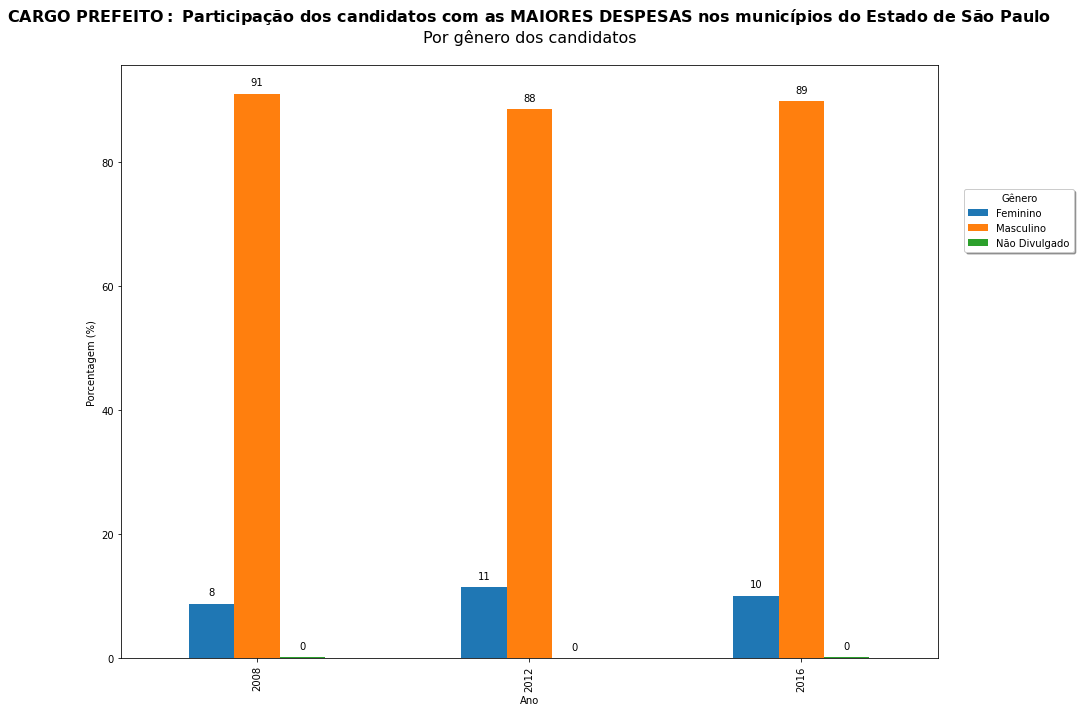

In [340]:
# Plotagem e gráfico 

dados = [list(concatenação_2008.groupby(['DS_GENERO'])['MUNICIPIOS'].count().apply(lambda x: 100 * x / len(concatenação_2008))),
         list(concatenacao_2012.groupby(['DS_GENERO'])['MUNICIPIOS'].count().apply(lambda x: 100 * x / len(concatenacao_2012))),
         list(concatenacao_2016.groupby(['DS_GENERO'])['MUNICIPIOS'].count().apply(lambda x: 100 * x / len(concatenacao_2016)))
] 


df = pd.DataFrame(dados,
                 index=['2008', '2012', '2016'],
                 columns=pd.Index(['Feminino', 'Masculino', 'Não Divulgado'], 
                 name='Legenda')).round(2)


ax = df.plot(kind='bar', figsize=(15,10))

titulo = "$\\bf{CARGO\ PREFEITO:\ Participação\ dos\ candidatos\ com\ as\ MAIORES\ DESPESAS\ nos\ municípios\ do\ Estado\ de\ São\ Paulo}$"
ax.set_title(titulo + '\nPor gênero dos candidatos\n', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem (%)')
ax.legend(title='Gênero', loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(rect.get_height()),
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/img1.png')

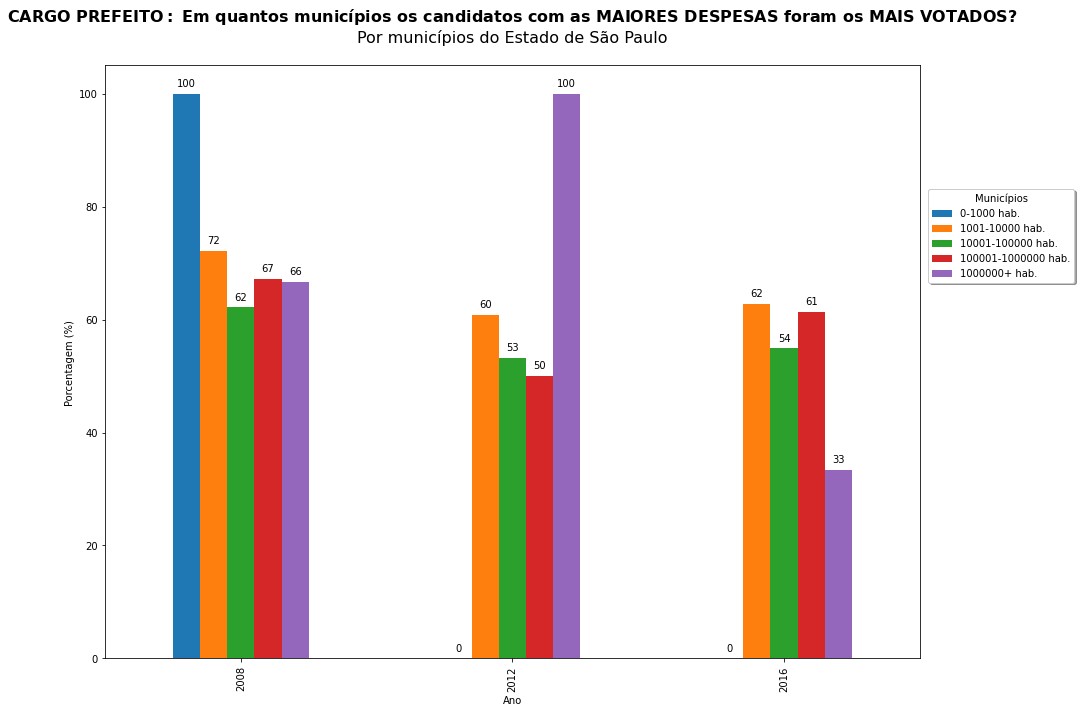

In [341]:
# Plotagem e gráfico

dados = [[((ate1mil_2008['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1mil_2008)), ((ate10mil_2008['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate10mil_2008)),
               ((ate100mil_2008['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate100mil_2008)), ((ate1milhao_2008['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1milhao_2008)),
               ((maior1milhao_2008['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(maior1milhao_2008))],
         [((ate1mil_2012['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1mil_2012)), ((ate10mil_2012['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate10mil_2012)),
               ((ate100mil_2012['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate100mil_2012)), ((ate1milhao_2012['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1milhao_2012)),
               ((maior1milhao_2012['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(maior1milhao_2012))],
              [((ate1mil_2016['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1mil_2016)), ((ate10mil_2016['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate10mil_2016)),
               ((ate100mil_2016['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate100mil_2016)), ((ate1milhao_2016['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(ate1milhao_2016)),
               ((maior1milhao_2016['MAIS VOTADO'].str.count("SIM").sum() * 100) / len(maior1milhao_2016))],
              ]


df = pd.DataFrame(dados,
                 index=['2008', '2012', '2016'],
                 columns=pd.Index(['0-1000 hab.', '1001-10000 hab.', '10001-100000 hab.', '100001-1000000 hab.', '1000000+ hab.'], 
                 name='Legenda')).round(2)


ax = df.plot(kind='bar', figsize=(15,10))

titulo = "$\\bf{CARGO\ PREFEITO:\ Em\ quantos\ municípios\ os\ candidatos\ com\ as\ MAIORES\ DESPESAS\ foram\ os\ MAIS\ VOTADOS?}$"
ax.set_title(titulo + '\nPor municípios do Estado de São Paulo\n', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem (%)')
ax.legend(title='Municípios', loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(rect.get_height()),
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/img2.png')

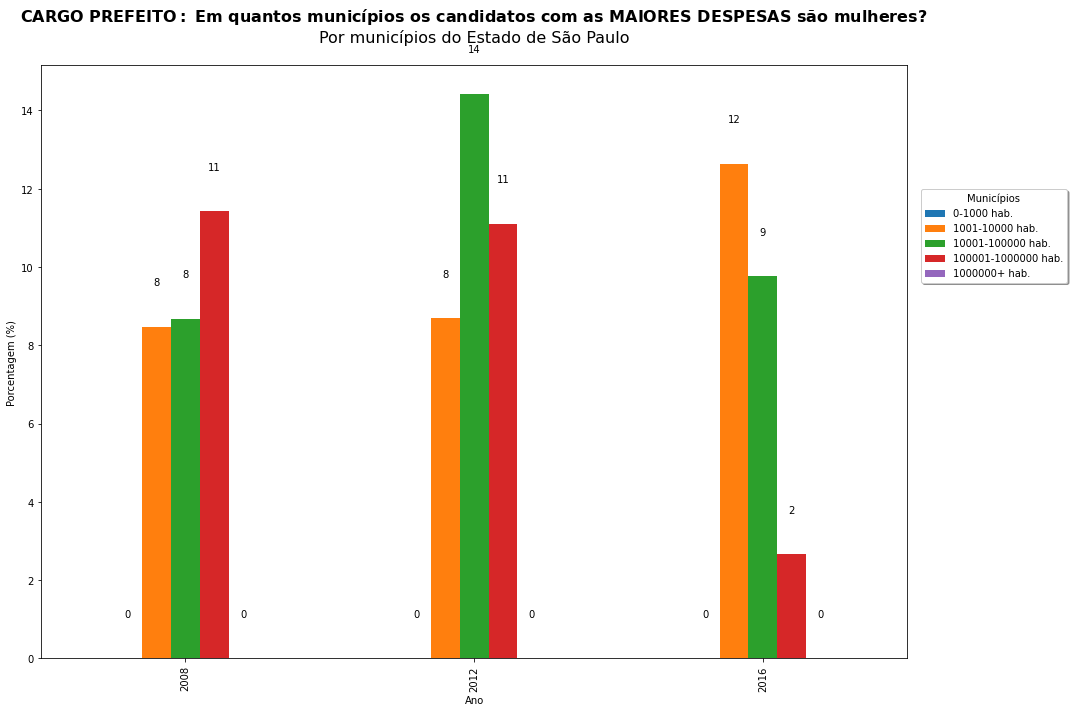

In [342]:
# Plotagem e gráfico

dados = [[((len(ate1mil_2008[ate1mil_2008['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1mil_2008)),
               ((len(ate10mil_2008[ate10mil_2008['DS_GENERO'] == "FEMININO"]) * 100) / len(ate10mil_2008)),
               ((len(ate100mil_2008[ate100mil_2008['DS_GENERO'] == "FEMININO"]) * 100) / len(ate100mil_2008)),
               ((len(ate1milhao_2008[ate1milhao_2008['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1milhao_2008)),
               ((len(maior1milhao_2008[maior1milhao_2008['DS_GENERO'] == "FEMININO"]) * 100) / len(maior1milhao_2008))],
         [((len(ate1mil_2012[ate1mil_2012['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1mil_2012)),
               ((len(ate10mil_2012[ate10mil_2012['DS_GENERO'] == "FEMININO"]) * 100) / len(ate10mil_2012)),
               ((len(ate100mil_2012[ate100mil_2012['DS_GENERO'] == "FEMININO"]) * 100) / len(ate100mil_2012)),
               ((len(ate1milhao_2012[ate1milhao_2012['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1milhao_2012)),
               ((len(maior1milhao_2012[maior1milhao_2012['DS_GENERO'] == "FEMININO"]) * 100) / len(maior1milhao_2012))],
         [((len(ate1mil_2016[ate1mil_2016['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1mil_2016)),
               ((len(ate10mil_2016[ate10mil_2016['DS_GENERO'] == "FEMININO"]) * 100) / len(ate10mil_2016)),
               ((len(ate100mil_2016[ate100mil_2016['DS_GENERO'] == "FEMININO"]) * 100) / len(ate100mil_2016)),
               ((len(ate1milhao_2016[ate1milhao_2016['DS_GENERO'] == "FEMININO"]) * 100) / len(ate1milhao_2016)),
               ((len(maior1milhao_2016[maior1milhao_2016['DS_GENERO'] == "FEMININO"]) * 100) / len(maior1milhao_2016))],
]


df = pd.DataFrame(dados,
                 index=['2008', '2012', '2016'],
                 columns=pd.Index(['0-1000 hab.', '1001-10000 hab.', '10001-100000 hab.', '100001-1000000 hab.', '1000000+ hab.'], 
                 name='Legenda')).round(2)


ax = df.plot(kind='bar', figsize=(15,10))

titulo = "$\\bf{CARGO\ PREFEITO:\ Em\ quantos\ municípios\ os\ candidatos\ com\ as\ MAIORES\ DESPESAS\ são\ mulheres?}$"
ax.set_title(titulo + '\nPor municípios do Estado de São Paulo\n', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem (%)')
ax.legend(title='Municípios', loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(rect.get_height()),
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/img3.png')

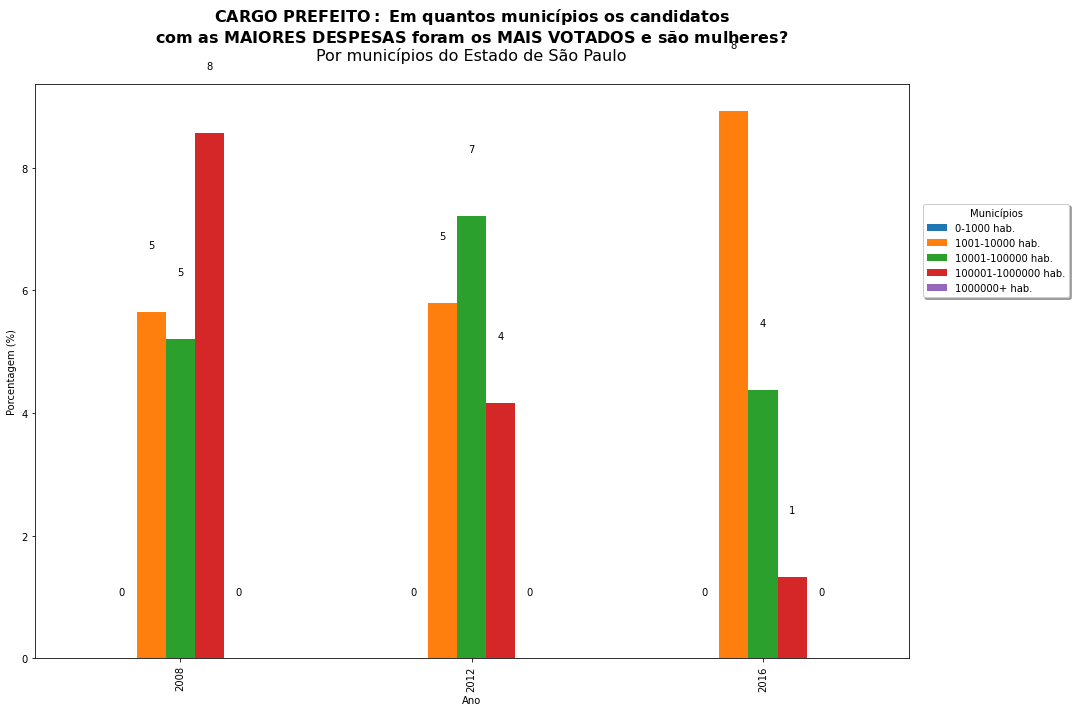

In [343]:
# Plotagem e gráfico

dados = [[((len(ate1mil_2008[(ate1mil_2008['MAIS VOTADO'] == "SIM") & (ate1mil_2008['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1mil_2008)),
               ((len(ate10mil_2008[(ate10mil_2008['MAIS VOTADO'] == "SIM") & (ate10mil_2008['DS_GENERO'] == "FEMININO")]) * 100) / len(ate10mil_2008)),
               ((len(ate100mil_2008[(ate100mil_2008['MAIS VOTADO'] == "SIM") & (ate100mil_2008['DS_GENERO'] == "FEMININO")]) * 100) / len(ate100mil_2008)),
               ((len(ate1milhao_2008[(ate1milhao_2008['MAIS VOTADO'] == "SIM") & (ate1milhao_2008['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1milhao_2008)),
               ((len(maior1milhao_2008[(maior1milhao_2008['MAIS VOTADO'] == "SIM") & (maior1milhao_2008['DS_GENERO'] == "FEMININO")]) * 100) / len(maior1milhao_2008))],
         [((len(ate1mil_2012[(ate1mil_2012['MAIS VOTADO'] == "SIM") & (ate1mil_2012['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1mil_2012)),
               ((len(ate10mil_2012[(ate10mil_2012['MAIS VOTADO'] == "SIM") & (ate10mil_2012['DS_GENERO'] == "FEMININO")]) * 100) / len(ate10mil_2012)),
               ((len(ate100mil_2012[(ate100mil_2012['MAIS VOTADO'] == "SIM") & (ate100mil_2012['DS_GENERO'] == "FEMININO")]) * 100) / len(ate100mil_2012)),
               ((len(ate1milhao_2012[(ate1milhao_2012['MAIS VOTADO'] == "SIM") & (ate1milhao_2012['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1milhao_2012)),
               ((len(maior1milhao_2012[(maior1milhao_2012['MAIS VOTADO'] == "SIM") & (maior1milhao_2012['DS_GENERO'] == "FEMININO")]) * 100) / len(maior1milhao_2012))],     
         [((len(ate1mil_2016[(ate1mil_2016['MAIS VOTADO'] == "SIM") & (ate1mil_2016['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1mil_2016)),
               ((len(ate10mil_2016[(ate10mil_2016['MAIS VOTADO'] == "SIM") & (ate10mil_2016['DS_GENERO'] == "FEMININO")]) * 100) / len(ate10mil_2016)),
               ((len(ate100mil_2016[(ate100mil_2016['MAIS VOTADO'] == "SIM") & (ate100mil_2016['DS_GENERO'] == "FEMININO")]) * 100) / len(ate100mil_2016)),
               ((len(ate1milhao_2016[(ate1milhao_2016['MAIS VOTADO'] == "SIM") & (ate1milhao_2016['DS_GENERO'] == "FEMININO")]) * 100) / len(ate1milhao_2016)),
               ((len(maior1milhao_2016[(maior1milhao_2016['MAIS VOTADO'] == "SIM") & (maior1milhao_2016['DS_GENERO'] == "FEMININO")]) * 100) / len(maior1milhao_2016))],
]


df = pd.DataFrame(dados,
                 index=['2008', '2012', '2016'],
                 columns=pd.Index(['0-1000 hab.', '1001-10000 hab.', '10001-100000 hab.', '100001-1000000 hab.', '1000000+ hab.'], 
                 name='Legenda')).round(2)


ax = df.plot(kind='bar', figsize=(15,10))

titulo = "$\\bf{CARGO\ PREFEITO:\ Em\ quantos\ municípios\ os\ candidatos}$"
titulo2 = "$\\bf{com\ as\ MAIORES\ DESPESAS\ foram\ os\ MAIS\ VOTADOS\ e\ são\ mulheres?}$"
ax.set_title(titulo + '\n' + titulo2 + '\nPor municípios do Estado de São Paulo\n', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem (%)')
ax.legend(title='Municípios', loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(rect.get_height()),
            ha='center', va='bottom')
    
plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/img4.png')